In [34]:
import csv
import pandas
import numpy as np 
import collections
import matplotlib.pyplot as plt

#this file loads in the data from the modified csv, and based on days selected, 
#loads in the power from on substation i(t) data. 
#the functions called are from the pandapowerfunctions (base) script or pandapowerfunctions_withEV (EVloading included) script
#the functions return different arrays for each line, bus, or grid, and then those values are plotted 

In [35]:
#converting array of currents to power and np array type, manual
#sk09adayi = [9, 9, 9, 10]
#sk09p = 11*np.array(sk09adayi)
#sk12p = 11*np.array(sk12adayi)
#sk15p = 11*np.array(sk15adayi)


In [53]:
#this cell loads in the csv file, creates numpy arrays for time and each station (one array of time, other arrays are substation's currents) 
#and then lets you pull the time indexes based on the days you want
#the i(t) data is pulled for the substations for those time indexes, and then converted to power (times 11 kv)
with open('HIS_skanstull_2015_16.csv') as csvfile:
    cvt = csv.reader(csvfile, delimiter = ';')
    timeslist = []
    sk09list = []
    sk12list = []
    sk15list = []
    for row in cvt:
        timeslist.append(row[0])
        sk09list.append(row[1])
        sk12list.append(row[2])
        sk15list.append(row[3])
        
    times= np.array(timeslist).tolist() #time can stay as string array
    
    #converting list (for appending) to numpy string array (default) to numpy float array
    sk09stringarray= np.array(sk09list)
    sk09 = sk09stringarray.astype(np.float)
    sk12stringarray= np.array(sk12list)
    sk12 = sk12stringarray.astype(np.float)
    sk15stringarray= np.array(sk15list)
    sk15 = sk15stringarray.astype(np.float)
    #print(times)
    dates= ['11-07-2016', '12-07-2016', '13-07-2016', '14-07-2016', '15-07-2016', '16-07-2016', '17-07-2016']
    timeIndexes1 = (np.where((np.core.defchararray.startswith(times, dates[0]))== True))[0]
    timeIndexes2 = (np.where((np.core.defchararray.startswith(times, dates[1]))== True))[0]
    timeIndexes3 = (np.where((np.core.defchararray.startswith(times, dates[2]))== True))[0]
    timeIndexes4 = (np.where((np.core.defchararray.startswith(times, dates[3]))== True))[0]
    timeIndexes5 = (np.where((np.core.defchararray.startswith(times, dates[4]))== True))[0]
    timeIndexes6 = (np.where((np.core.defchararray.startswith(times, dates[5]))== True))[0]
    timeIndexes7 = (np.where((np.core.defchararray.startswith(times, dates[6]))== True))[0] #delete timeIndexes7 if you have less days
    #explanation of above lines, below is equivalent to the code above, the code above is more efficiently written
    #timeIndexarray = np.core.defchararray.startswith(times, '12-01-2016') #returns an array of Trues and Falses
    #timeIndexesTuple= np.where(timeIndexarray==True) #grab all the indexes of True
    #timeIndexes= timeIndexesTuple[0] #the above line returns a tuple, first element is the array of the indexes wanted
    
    #combine all the days
    timeIndexes = np.concatenate([timeIndexes1, timeIndexes2, timeIndexes3, timeIndexes4, timeIndexes5, timeIndexes6, timeIndexes7])
    
    #pull the  i(t) data for each substation based on time, converts to power by multiplying by v=11
    v=11
    sk09p=v*sk09[timeIndexes]
    sk12p=v*sk12[timeIndexes]
    sk15p=v*sk15[timeIndexes]
print(sk12p)

[222.75 222.75 222.75 222.75 222.75 222.75 222.75 222.75 222.75 222.75
 222.75 222.75 222.75 222.75 222.75 222.75 222.75 222.75 222.75 222.75
 222.75 222.75 222.75 222.75 222.75 222.75 222.75 222.75 222.75 222.75
 222.75 222.75 222.75 222.75 222.75 222.75 248.16 261.25 261.25 261.25
 278.3  244.75 244.75 244.75 244.75 244.75 244.75 244.75 244.75 244.75
 244.75 244.75 244.75 244.75 244.75 244.75 244.75 244.75 244.75 244.75
 244.75 243.54 242.   249.92 250.25 250.25 250.25 250.25 250.25 250.25
 250.25 250.25 250.25 250.25 250.25 250.25 250.25 250.25 250.25 250.25
 250.25 250.25 250.25 250.25 250.25 250.25 250.25 250.25 250.25 250.25
 250.25 250.25 250.25 250.25 250.25 250.25 250.25 250.25 250.25 172.7
 140.25 140.25 140.25 140.25 140.25 207.68 253.   253.   253.   253.
 253.   253.   253.   253.   253.   253.   253.   253.   163.57 143.
 143.   143.   143.   143.   143.   143.   143.   143.   143.   143.
 200.86 255.75 255.75 255.75 255.75 255.75 255.75 255.75 255.75 255.75
 255.75 229.7

In [54]:
from pandapowerfunctions_withEV import *
#other option is pandapowerfunctions.py (base) if you change the python script or any function I recommend restarting the kernel occasionally to make sure it reads in the changes
#this cell takes a while to run
# LP stands for loading percents of the line. The function ppsolverLP returns a numpy array of arrays. First array is currents through first line for each hour of the day. 
#Second array is currents of second line for each hour, etc. same for third, fourth array
#ln = line number (see function) ex. Line M0: n =0, Line L0: n=1, Line L1: n =2
#bn = bus number based on order bus was created, bus 0 is always slack(see function) ex. SK09: n = 1, SK12b: n=2, SK12: n = 3
ln=2
bn=1
#p vs q, p is active results, q is reactive results 
p=0
q=1
LPall= ppsolverLP(sk09p, sk12p, sk15p)
BVall= ppsolverBV(sk09p, sk12p, sk15p)
EGall= ppsolverEG(sk09p, sk12p, sk15p)
print(len(LPall[ln])) #len should equal number of days times 24 hours in a day


168


[92.43663749 92.43663749 92.43663749 92.43663749 92.43663749 91.59281235
 90.96025846 91.49246515 94.43550729 95.5712107  95.14752426 95.14752426
 95.14752426 96.48882407 95.2593668  95.51747756 95.44584527 95.39660596
 95.07298119 94.4980141  93.47397502 93.47397502 92.30645184 91.95608922
 91.95608922 91.95608922 91.95608922 91.95608922 91.95608922 91.95608922
 90.37747011 91.0766497  93.0438423  94.79879161 95.22208223 95.22208223
 95.31604646 95.59509455 95.59509455 96.01479911 95.86837288 95.70707013
 95.70707013 94.19153616 93.18320641 92.54763078 92.54763078 92.54763078
 92.54763078 92.02997478 91.03391889 91.03391889 91.03391889 91.03391889
 91.03391889 91.03391889 93.02457296 94.8568909  95.70707013 95.81310407
 96.1268977  95.97893446 95.89376934 95.89376934 95.64435973 94.32837776
 94.32837776 94.23466541 92.80675609 92.80675609 92.80675609 92.80675609
 91.99007454 91.32872941 91.32872941 91.32872941 91.32872941 91.32872941
 91.32872941 91.32872941 92.88971768 96.03721622 94

Text(0.5,1,'With EV i Loading Percent for Line n, Week of 11-07-2016')

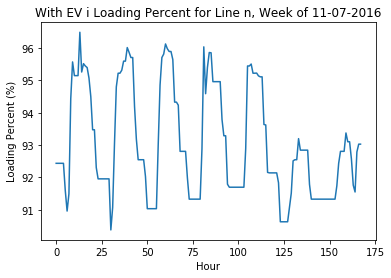

In [56]:
data = LPall[3]
print(data)
x = np.arange(0, len(data), 1); #makes the increments for x axis
plt.plot(x, data) 
#plt.plot(x, LPall[1]) code to plot another line on same graph, but the magnitudes are very different so it made the axis weird

plt.ylabel('Loading Percent (%)')
plt.xlabel('Hour')
plt.title('With EV i Loading Percent for Line n, Week of %s' %dates[0])

[0.99714457 0.99714457 0.99714457 0.99714457 0.99714457 0.99717721
 0.99720172 0.99718109 0.99706758 0.99702402 0.99704025 0.99704025
 0.99704025 0.99698891 0.99703596 0.99702607 0.99702882 0.9970307
 0.99704311 0.99706518 0.99710456 0.99710456 0.9971496  0.99716315
 0.99716315 0.99716315 0.99716315 0.99716315 0.99716315 0.99716315
 0.99722435 0.99719721 0.99712114 0.99705363 0.99703739 0.99703739
 0.99703379 0.9970231  0.9970231  0.99700703 0.99701264 0.99701881
 0.99701881 0.99707696 0.99711577 0.99714029 0.99714029 0.99714029
 0.99714029 0.99716029 0.99719886 0.99719886 0.99719886 0.99719886
 0.99719886 0.99719886 0.99712188 0.9970514  0.99701881 0.99701475
 0.99700275 0.99700841 0.99701167 0.99701167 0.99702121 0.9970717
 0.9970717  0.9970753  0.99713029 0.99713029 0.99713029 0.99713029
 0.99716183 0.99718744 0.99718744 0.99718744 0.99718744 0.99718744
 0.99718744 0.99718744 0.99712709 0.99700618 0.99706169 0.99703053
 0.99701287 0.99701321 0.9970474  0.9970474  0.9970474  0.997047

Text(0.5,1,'Bus Voltage pu for Bus SK12b for the Week  11-07-2016')

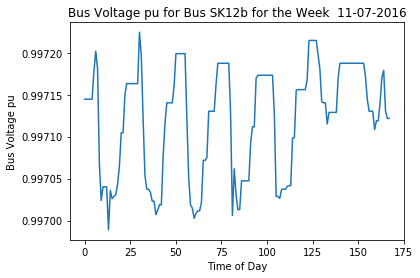

In [61]:
data = BVall[4]
print(data)
x = np.arange(0, len(data), 1); 
plt.plot(x, data) 
plt.ylabel('Bus Voltage pu')
plt.xlabel('Time of Day')
plt.title('Bus Voltage pu for Bus SK12b for the Week  %s' %dates[0])

Text(0.5,1,'External Grid Active for a Chosen Time Period')

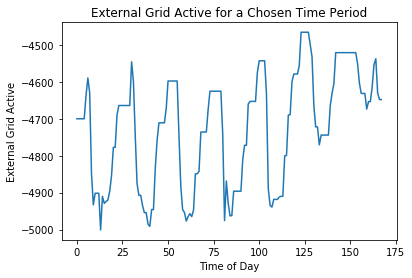

In [59]:
data = EGall[0]
x = np.arange(0, len(data), 1); 
plt.plot(x, data) 
plt.ylabel('External Grid Active')
plt.xlabel('Time of Day')
plt.title('External Grid Active for a Chosen Time Period')

Text(0.5,1,'External Grid Reactive for a Chosen Day')

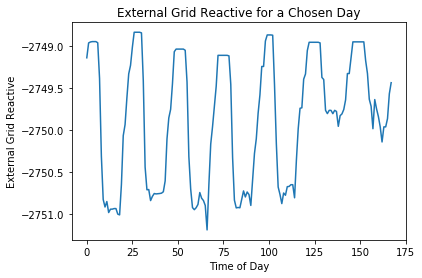

In [52]:
data = EGall[1]
x = np.arange(0, len(data), 1); 
plt.plot(x, data) 
plt.ylabel('External Grid Reactive')
plt.xlabel('Time of Day')
plt.title('External Grid Reactive for a Chosen Time Period')